## Data Observatory

CARTO's Data Observatory is a spatial data platfrom that enables data scientists to augment their data and broaden their analyses by using thousands of datasets from around the globe.

This guide is intended for those who want to start augmenting their data using CARTOframes and wish to explore CARTO's public Data Observatory catalog to find datasets that best fit their use cases and analyses.
For further learning you can also check out the [Data Observatory examples](/developers/cartoframes/examples/#example-data-observatory).

### Data Discovery

The Data Obsevatory data catalog is comprised of thousands of curated spatial datasets. When searching for data the easiest way to find what you are looking for is to make use of a faceted search. A faceted (or hierarchical) search allows you to narrow down search results by applying multiple filters based on the faceted classification of catalog datasets. For more information check the [data discovery example](/developers/cartoframes/examples/#example-discover-a-dataset).

Datasets are organized in these main hierarchies: country, category, provider and geography (or spatial resolution).

> The catalog is public and you don't need a CARTO account to search for available datasets. You can access the web version of the catalog [here](https://carto.com/spatial-data-catalog).

#### Dataset and variables metadata

The Data Observatory catalog is not only a repository of curated spatial datasets, it also contains valuable information that helps better understand the underlying data of every dataset so you can make an informed decision on what data best fits your problem.

Some of the augmented metadata you can find for each dataset in the catalog is:

- `head` and `tail` methods to get a glimpse of the actual data. This helps you to understand the available columns, data types, etc., to start modelling your problem right away.
- `geom_coverage` to visualize on a map the geographical coverage of the data in the `Dataset`.
- `counts`, `fields_by_type` and a full `describe` method with stats of the actual values in the dataset, such as: average, stdev, quantiles, min, max, median for each of the variables of the dataset.

You don't need a subscription to a dataset to be able to query the augmented metadata, it's publicly available for anyone exploring the Data Observatory catalog.

Let's review some of that information, starting by getting a glimpse of the ten first or last rows of the actual data of the dataset:

In [1]:
from cartoframes.data.observatory import Dataset

dataset = Dataset.get('ags_sociodemogr_a7e14220')
dataset.head()

,DWLCY,DWLPY,HHDCY,HHDPY,POPCY,POPPY,geoid,VPHCY1,do_date,AGECYMED,...,MARCYDIVOR,MARCYNEVER,MARCYWIDOW,RCHCYAMNHS,RCHCYASNHS,RCHCYBLNHS,RCHCYHANHS,RCHCYMUNHS,RCHCYOTNHS,RCHCYWHNHS
0,1057,1112,932,986,1500,1648,040130405071,442,2020-01-01 00:00:00+00:00,77.40,...,149,4,228,0,11,20,0,25,0,1317
1,1964,2069,1774,1877,2595,2868,040130405072,1049,2020-01-01 00:00:00+00:00,76.88,...,414,160,699,0,74,68,7,55,0,2167
2,1049,1101,897,933,1585,1716,040130610182,460,2020-01-01 00:00:00+00:00,69.88,...,31,217,246,2,55,43,9,26,0,1313
3,1084,1137,910,940,1503,1616,040138175002,392,2020-01-01 00:00:00+00:00,71.44,...,191,79,268,8,24,38,0,8,0,1290
4,682,706,574,591,980,1039,040190043241,244,2020-01-01 00:00:00+00:00,72.38,...,30,44,195,3,9,0,0,0,0,902
5,880,910,840,869,1249,1284,060133511032,539,2020-01-01 00:00:00+00:00,76.75,...,160,40,319,0,136,19,2,12,5,1024
6,1467,1534,1314,1467,1658,1800,060590995101,831,2020-01-01 00:00:00+00:00,74.58,...,423,136,496,3,226,10,1,16,0,1269
7,704,753,693,730,1078,1176,060610210391,338,2020-01-01 00:00:00+00:00,73.86,...,117,63,215,5,33,7,0,9,0,986
8,1582,1691,1553,1650,2540,2795,060610236001,818,2020-01-01 00:00:00+00:00,68.80,...,406,45,301,5,168,26,3,19,0,2183
9,1186,1268,1163,1234,1980,2176,060610236002,415,2020-01-01 00:00:00+00:00,68.59,...,253,60,223,5,97,22,1,10,0,1750


Alternatively, you can get the last ten ones with `dataset.tail()`

An overview of the coverage of the dataset

In [2]:
dataset.geom_coverage()

Some stats about the dataset:

In [3]:
dataset.counts()

rows                    217182.0
cells                 23890020.0
null_cells                   0.0
null_cells_percent           0.0
dtype: float64

In [4]:
dataset.fields_by_type()

float          5
string         2
integer      102
timestamp      1
dtype: int64

In [5]:
dataset.describe()

,POPCY,POPCYGRP,POPCYGRPI,AGECY0004,AGECY0509,AGECY1014,AGECY1519,AGECY2024,AGECY2529,AGECY3034,...,DWLCYVACNT,DWLCYRENT,DWLCYOWNED,POPPY,HHDPY,DWLPY,AGEPYMED,INCPYPCAP,INCPYAVEHH,INCPYMEDHH
avg,1520.470,37.257,17.988,90.470,93.410,95.816,97.264,100.084,108.362,104.433,...,49.577,211.630,383.558,1568.307,607.559,671.856,39.894,42928.961,107309.801,79333.276
max,67100.000,19752.000,12053.000,5393.000,5294.000,5195.000,7606.000,14804.000,5767.000,5616.000,...,6547.000,10057.000,23676.000,75845.000,28115.000,32640.000,87.500,3824975.000,11127199.000,350000.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
sum,330218663.000,8091501.000,3906704.000,19648543.000,20287023.000,20809454.000,21124098.000,21736551.000,23534360.000,22680873.000,...,10767170.000,45962130.000,83301818.000,340607958.000,131950960.000,145914927.000,8664364.200,9323397645.000,23305757123.000,17229759532.000
range,67100.000,19752.000,12053.000,5393.000,5294.000,5195.000,7606.000,14804.000,5767.000,5616.000,...,6547.000,10057.000,23676.000,75845.000,28115.000,32640.000,87.500,3824975.000,11127199.000,350000.000
stdev,1063.417,242.869,158.206,80.448,83.389,83.518,111.783,124.412,96.428,93.590,...,98.498,235.326,316.331,1141.981,413.855,446.769,7.567,31788.703,78351.308,42620.182
q1,850.000,0.000,0.000,44.000,44.000,46.000,45.000,43.000,50.000,49.000,...,11.000,60.000,182.000,867.000,344.000,384.000,34.070,21680.000,55361.000,47018.000
q3,1454.000,0.000,0.000,83.000,86.000,89.000,87.000,86.000,98.000,95.000,...,34.000,178.000,375.000,1485.000,581.000,648.000,41.010,40582.000,101272.000,79083.000
median,1125.000,0.000,0.000,62.000,63.000,65.000,64.000,62.000,71.000,69.000,...,20.000,108.000,274.000,1143.000,452.000,504.000,37.710,30563.000,76713.000,62122.000
interquartile_range,604.000,0.000,0.000,39.000,42.000,43.000,42.000,43.000,48.000,46.000,...,23.000,118.000,193.000,618.000,237.000,264.000,6.940,18902.000,45911.000,32065.000


Every `Dataset` instance in the catalog contains other useful metadata:

In [6]:
dataset.to_dict()

{'slug': 'ags_sociodemogr_a7e14220',
 'name': 'Sociodemographics - United States of America (Census Block Group)',
 'description': 'Census and ACS sociodemographic data estimated for the current year and data projected to five years. Projected fields are general aggregates (total population, total households, median age, avg income etc.)',
 'category_id': 'demographics',
 'country_id': 'usa',
 'data_source_id': 'sociodemographics',
 'provider_id': 'ags',
 'geography_name': 'Census Block Group - United States of America',
 'geography_description': None,
 'temporal_aggregation': 'yearly',
 'time_coverage': None,
 'update_frequency': None,
 'is_public_data': False,
 'lang': 'eng',
 'version': '2020',
 'category_name': 'Demographics',
 'provider_name': 'Applied Geographic Solutions',
 'geography_id': 'carto-do.ags.geography_usa_blockgroup_2015',
 'id': 'carto-do.ags.demographics_sociodemographics_usa_blockgroup_2015_yearly_2020'}

When exploring datasets in the Data Observatory catalog it's very important that you understand clearly what variables are available to enrich your own data.

For each `Variable` in each dataset, the Data Observatory provides (as it does for datasets) a set of methods and attributes to understand their underlaying data.

Some of them are:

- `head` and `tail` methods to get a glimpse of the actual data and start modelling your problem right away.
- `counts`, `quantiles` and a full `describe` method with stats of the actual values in the dataset, such as: average, stdev, quantiles, min, max, median for each of the variables of the dataset.
- an `histogram` plot with the distribution of the values on each variable.

Let's review some of that augmented metadata for the variables in the AGS population dataset.

In [7]:
from cartoframes.data.observatory import Variable

variable = Variable.get('POPCY_4534fac4')
variable

<Variable.get('POPCY_4534fac4')> #'Population (current year)'

In [8]:
variable.to_dict()

{'slug': 'POPCY_4534fac4',
 'name': 'Total Population',
 'description': 'Population (current year)',
 'db_type': 'INTEGER',
 'agg_method': 'SUM',
 'column_name': 'POPCY',
 'variable_group_id': None,
 'dataset_id': 'carto-do.ags.demographics_sociodemographics_usa_blockgroup_2015_yearly_2020',
 'id': 'carto-do.ags.demographics_sociodemographics_usa_blockgroup_2015_yearly_2020.POPCY'}

There's also some utility methods to understand the underlying data for each variable:

In [9]:
variable.head()

0    1500
1    2595
2    1585
3    1503
4     980
5    1249
6    1658
7    1078
8    2540
9    1980
dtype: int64

In [10]:
variable.counts()

all                217182.000
null                    0.000
zero                  299.000
extreme              9073.000
distinct             6756.000
outliers            26998.000
null_percent            0.000
zero_percent            0.138
extreme_percent         0.042
distinct_percent        3.111
outliers_percent        0.124
dtype: float64

In [11]:
variable.quantiles()

q1                      850
q3                     1454
median                 1125
interquartile_range     604
dtype: int64

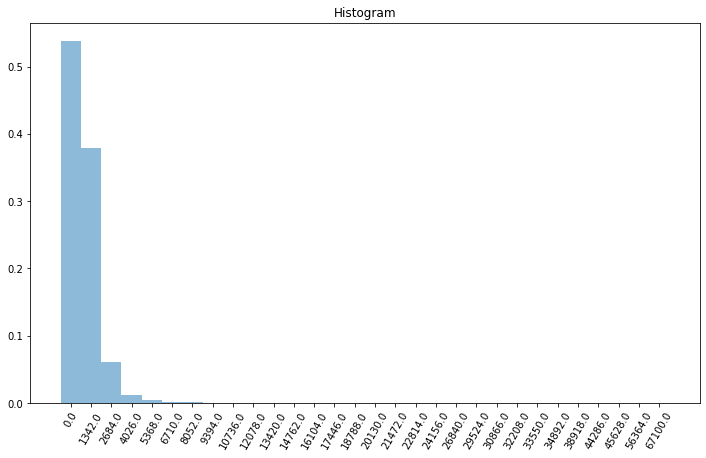

In [12]:
variable.histogram()

In [13]:
variable.describe()

avg                        1520.470
max                       67100.000
min                           0.000
sum                   330218663.000
range                     67100.000
stdev                      1063.417
q1                          850.000
q3                         1454.000
median                     1125.000
interquartile_range         604.000
dtype: float64

#### Subscribe to a Dataset in the catalog

Once you have explored the catalog and have identified a dataset with the variables you need for your analysis and in the right spatial resolution, you can check `is_public_data` to know whether the dataset is freely accessible or you first need to purchase a license. Subscriptions are available for CARTO's Enterprise plan users.

Subscriptions to datasets allow you to either use them from CARTOframes to enrich your own data or to download them. See the [enrichment guide](/developers/cartoframes/guides/Data-Observatory/#data-enrichment) for more information.

Let's check out the dataset and geography from our previous example:

In [14]:
dataset = Dataset.get('ags_sociodemogr_a7e14220')

In [15]:
dataset.is_public_data

False

This `dataset` is not public data, which means that you need a subscription to be able to use it to enrich your own data.

> To subscribe to premium data in the Data Observatory catalog you need an Enterprise CARTO account with access to the Data Observatory.

In [16]:
from cartoframes.auth import set_default_credentials

set_default_credentials('creds.json')

In [17]:
dataset.subscribe()

**Licenses to data in the Data Observatory grant you the right to use the data for the period of one year. Every non-public dataset or geography you want to use to enrich your own data require a valid license.**

You can check the actual status of your subscriptions directly from the catalog.

In [18]:
from cartoframes.data.observatory import Catalog

Catalog().subscriptions()

Datasets: [<Dataset.get('ags_sociodemogr_a7e14220')>, <Dataset.get('ags_retailpoten_aaf25a8c')>, <Dataset.get('pb_consumer_po_62cddc04')>, <Dataset.get('ags_sociodemogr_f510a947')>, <Dataset.get('ags_consumer_sp_dbabddfb')>, <Dataset.get('spa_geosocial_s_d5dc42ae')>, <Dataset.get('mc_geographic__7980c5c3')>, <Dataset.get('pb_points_of_i_94bda91b')>, <Dataset.get('u360_sociodemogr_28e93b81')>]
Geographies: [<Geography.get('ags_blockgroup_1c63771c')>, <Geography.get('pb_lat_lon_d01ac868')>, <Geography.get('pb_lat_lon_b6575b9')>, <Geography.get('u360_grid100x100_24162784')>]

### Data Access

Now that we have explored some basic information about the Dataset, we will proceed to download a sample of the Dataset into a dataframe so we can operate with it using Python. 

_Note: You'll need your [CARTO Account](https://carto.com/signup) credentials to perform this action._

In [19]:
from cartoframes.auth import set_default_credentials

set_default_credentials('creds.json')

In [20]:
from cartoframes.data.observatory import Dataset

dataset = Dataset.get('ags_sociodemogr_a7e14220')

In [21]:
# Filter by SQL query
query = "SELECT * FROM $dataset$ LIMIT 50"

dataset_df = dataset.to_dataframe(sql_query=query)

**Note about SQL filters**

Our SQL filtering queries allow for any PostgreSQL and PostGIS operation, so you can filter the rows (by a WHERE condition) or the columns (using the SELECT). Some common examples are filtering the Dataset by bounding box or filtering by column value: 

```
SELECT * FROM $dataset$ WHERE ST_IntersectsBox(geom, -74.044467,40.706128,-73.891345,40.837690)
```

```
SELECT total_pop, geom FROM $dataset$
```

A good tool to get the bounding box of a specific area is [bboxfinder.com](http://bboxfinder.com/#0.000000,0.000000,0.000000,0.000000).

In [22]:
# First rows of the Dataset sample
dataset_df.head()

,BLOCKGROUP,POPCY,POPCYGRP,POPCYGRPI,AGECY0004,AGECY0509,AGECY1014,AGECY1519,AGECY2024,AGECY2529,...,POPPY,HHDPY,DWLPY,AGEPYMED,INCPYPCAP,INCPYAVEHH,INCPYMEDHH,geoid,do_date,geom
0,120570140122,1999,0,0,5,4,3,0,6,8,...,2184,1324,1462,73.060,42925,70807,70419,120570140122,2020-01-01 00:00:00+00:00,"POLYGON ((-82.38386 27.68793, -82.38408 27.687..."
1,390759768011,3029,0,0,276,317,325,303,247,206,...,2989,702,743,25.940,32716,139300,96153,390759768011,2020-01-01 00:00:00+00:00,"POLYGON ((-81.79413 40.56118, -81.79423 40.560..."
2,60372671002,997,0,0,65,60,45,35,32,63,...,991,445,464,43.820,81355,181174,144601,60372671002,2020-01-01 00:00:00+00:00,"POLYGON ((-118.42418 34.05756, -118.42395 34.0..."
3,60379800141,236,10,0,3,5,4,3,7,10,...,235,180,183,54.670,129559,168394,174999,60379800141,2020-01-01 00:00:00+00:00,"POLYGON ((-118.26088 33.76850, -118.26070 33.7..."
4,60750155002,1443,99,1,28,17,21,28,105,202,...,1458,927,998,47.970,143367,224783,125191,60750155002,2020-01-01 00:00:00+00:00,"POLYGON ((-122.43821 37.78546, -122.43786 37.7..."


You can also download the dataset directly to a CSV file

In [23]:
query = "SELECT * FROM $dataset$ LIMIT 50"

dataset_df = dataset.to_csv('my_dataset.csv', sql_query=query)

Data saved: my_dataset.csv


To load it as a DataFrame you can do:

    df = pandas.read_csv('my_dataset.csv')



### Data Enrichment

We define enrichment as the process of augmenting your data with new variables by means of a spatial join between your data and a `Dataset` in CARTO's Data Observatory, aggregated at a given spatial resolution, or in other words:

"*Enrichment is the process of adding variables to a geometry, which we call the target, (point, line, polygon…) from a spatial (polygon) dataset, which we call the source*"

We recommend you also check out the [CARTOframes quickstart guide](/developers/cartoframes/guides/Quickstart/) since it offers a complete example of data discovery and enrichment and also helps you build a simple dashboard to draw conclusions from the resulting data.

_Note: You'll need your [CARTO Account](https://carto.com/signup) credentials to perform this action._

In [24]:
from cartoframes.auth import set_default_credentials

set_default_credentials('creds.json')

In [25]:
from cartoframes.data.observatory import Dataset

dataset = Dataset.get('ags_sociodemogr_a7e14220')
variables = dataset.variables
variables

[<Variable.get('BLOCKGROUP_30e525a6')> #'Geographic Identifier',
 <Variable.get('POPCY_4534fac4')> #'Population (current year)',
 <Variable.get('POPCYGRP_3033ef2e')> #'Population in Group Quarters (current year)',
 <Variable.get('POPCYGRPI_1e42899')> #'Institutional Group Quarters Population (current y...',
 <Variable.get('AGECY0004_aaae373a')> #'Population age 0-4 (current year)',
 <Variable.get('AGECY0509_d2d4896c')> #'Population age 5-9 (current year)',
 <Variable.get('AGECY1014_b09611e')> #'Population age 10-14 (current year)',
 <Variable.get('AGECY1519_7373df48')> #'Population age 15-19 (current year)',
 <Variable.get('AGECY2024_32919d33')> #'Population age 20-24 (current year)',
 <Variable.get('AGECY2529_4aeb2365')> #'Population age 25-29 (current year)',
 <Variable.get('AGECY3034_9336cb17')> #'Population age 30-34 (current year)',
 <Variable.get('AGECY3539_eb4c7541')> #'Population age 35-39 (current year)',
 <Variable.get('AGECY4044_41a06569')> #'Population age 40-44 (current ye

The `ags_sociodemogr_f510a947` dataset contains socio-demographic variables aggregated by Census block group level. 

Let's try and find a variable for total population:

In [26]:
vdf = variables.to_dataframe()
vdf[vdf['name'].str.contains('pop', case=False, na=False)]

,slug,name,description,db_type,agg_method,column_name,variable_group_id,dataset_id,id
1,POPCY_4534fac4,Total Population,Population (current year),INTEGER,SUM,POPCY,None,carto-do.ags.demographics_sociodemographics_us...,carto-do.ags.demographics_sociodemographics_us...
2,POPCYGRP_3033ef2e,POPCYGRP,Population in Group Quarters (current year),INTEGER,SUM,POPCYGRP,None,carto-do.ags.demographics_sociodemographics_us...,carto-do.ags.demographics_sociodemographics_us...
3,POPCYGRPI_1e42899,POPCYGRPI,Institutional Group Quarters Population (curre...,INTEGER,SUM,POPCYGRPI,None,carto-do.ags.demographics_sociodemographics_us...,carto-do.ags.demographics_sociodemographics_us...
84,LBFCYPOP16_75363c6f,LBFCYPOP16,Population Age 16+ (current year),INTEGER,SUM,LBFCYPOP16,carto-do.ags.demographics_sociodemographics_us...,carto-do.ags.demographics_sociodemographics_us...,carto-do.ags.demographics_sociodemographics_us...
101,POPPY_24dbbb56,Total population,"Population (projected, five yearsA)",INTEGER,SUM,POPPY,None,carto-do.ags.demographics_sociodemographics_us...,carto-do.ags.demographics_sociodemographics_us...


We can store the variable instance we need by searching the Catalog by its `slug`, in this case `POPCY_4534fac4`:

In [27]:
variable = Variable.get('POPCY_4534fac4')
variable.to_dict()

{'slug': 'POPCY_4534fac4',
 'name': 'Total Population',
 'description': 'Population (current year)',
 'db_type': 'INTEGER',
 'agg_method': 'SUM',
 'column_name': 'POPCY',
 'variable_group_id': None,
 'dataset_id': 'carto-do.ags.demographics_sociodemographics_usa_blockgroup_2015_yearly_2020',
 'id': 'carto-do.ags.demographics_sociodemographics_usa_blockgroup_2015_yearly_2020.POPCY'}

The `POPCY` variable contains the `SUM` of the population per blockgroup for the year 2019. Let's enrich our stores DataFrame with that variable.

#### Enrich points

Let's start by loading the geocoded Starbucks stores:

In [28]:
from geopandas import read_file

stores_gdf = read_file('http://libs.cartocdn.com/cartoframes/files/starbucks_brooklyn_geocoded.geojson')
stores_gdf.head()

,cartodb_id,field_1,name,address,revenue,geometry
0,1,0,Franklin Ave & Eastern Pkwy,"341 Eastern Pkwy,Brooklyn, NY 11238",1321040.772,POINT (-73.95901 40.67109)
1,2,1,607 Brighton Beach Ave,"607 Brighton Beach Avenue,Brooklyn, NY 11235",1268080.418,POINT (-73.96122 40.57796)
2,3,2,65th St & 18th Ave,"6423 18th Avenue,Brooklyn, NY 11204",1248133.699,POINT (-73.98976 40.61912)
3,4,3,Bay Ridge Pkwy & 3rd Ave,"7419 3rd Avenue,Brooklyn, NY 11209",1185702.676,POINT (-74.02744 40.63152)
4,5,4,Caesar's Bay Shopping Center,"8973 Bay Parkway,Brooklyn, NY 11214",1148427.411,POINT (-74.00098 40.59321)


Alternatively, you can load data in any geospatial format supported by GeoPandas or CARTO.

As we can see, for each store we have its name, address, the total revenue by year and a `geometry` column indicating the location of the store. This is important because for the enrichment service to work, we need a DataFrame with a geometry column encoded as a [shapely](https://pypi.org/project/Shapely/) object.

We can now create a new `Enrichment` instance, and since the `stores_gdf` dataset represents store locations (points), we can use the `enrich_points` function passing as arguments the stores DataFrame and a list of `Variables` (that we have a valid subscription from the Data Observatory catalog for).

In this case we are only enriching one variable (the total population), but we could enrich a list of them.

In [29]:
from cartoframes.data.observatory import Enrichment

enriched_stores_gdf = Enrichment().enrich_points(stores_gdf, [variable])
enriched_stores_gdf.head()

,cartodb_id,field_1,name,address,revenue,geometry,POPCY,do_area
0,1,0,Franklin Ave & Eastern Pkwy,"341 Eastern Pkwy,Brooklyn, NY 11238",1321040.772,POINT (-73.95901 40.67109),2608,59840.197
1,2,1,607 Brighton Beach Ave,"607 Brighton Beach Avenue,Brooklyn, NY 11235",1268080.418,POINT (-73.96122 40.57796),1792,60150.637
2,3,2,65th St & 18th Ave,"6423 18th Avenue,Brooklyn, NY 11204",1248133.699,POINT (-73.98976 40.61912),733,38950.619
3,4,3,Bay Ridge Pkwy & 3rd Ave,"7419 3rd Avenue,Brooklyn, NY 11209",1185702.676,POINT (-74.02744 40.63152),1155,57353.293
4,5,4,Caesar's Bay Shopping Center,"8973 Bay Parkway,Brooklyn, NY 11214",1148427.411,POINT (-74.00098 40.59321),2266,188379.243


Once the enrichment finishes, we can see there is a new column in our DataFrame called `POPCY` with population projected for the year 2019, from the US Census block group which contains each one of our Starbucks stores. The enrichment process also provides an extra column called `do_area` with the information of the area in square meters covered by the polygons in the source dataset we are using to enrich our data.

#### Enrich polygons

Next, let's do a second enrichment, but this time using a DataFrame with areas of influence calculated using the [CARTOframes isochrones](/developers/cartoframes/reference/#heading-Isolines) service to obtain the polygon around each store that covers the area within an 8, 17 and 25 minute walk.

In [30]:
aoi_gdf = read_file('http://libs.cartocdn.com/cartoframes/files/starbucks_brooklyn_isolines.geojson')
aoi_gdf.head()

,data_range,lower_data_range,range_label,geometry
0,500,0,8 min.,"MULTIPOLYGON (((-73.95959 40.67571, -73.95971 ..."
1,1000,500,17 min.,"POLYGON ((-73.95988 40.68110, -73.95863 40.681..."
2,1500,1000,25 min.,"POLYGON ((-73.95986 40.68815, -73.95711 40.688..."
3,500,0,8 min.,"MULTIPOLYGON (((-73.96185 40.58321, -73.96231 ..."
4,1000,500,17 min.,"MULTIPOLYGON (((-73.96684 40.57483, -73.96830 ..."


In this case we have a DataFrame which, for each index in the `stores_gdf`, contains a polygon of the areas of influence around each store at 8, 17 and 25 minute walking intervals. Again the `geometry` is encoded as a `shapely` object.

In this case, the `Enrichment` service provides an `enrich_polygons` function, which in its basic version, works in the same way as the `enrich_points` function. It just needs a DataFrame with polygon geometries and a list of variables to enrich:

In [31]:
from cartoframes.data.observatory import Enrichment

enriched_aoi_gdf = Enrichment().enrich_polygons(aoi_gdf, [variable])
enriched_aoi_gdf.head()

,data_range,lower_data_range,range_label,geometry,POPCY
0,500,0,8 min.,"MULTIPOLYGON (((-73.95959 40.67571, -73.95971 ...",21893.522
1,1000,500,17 min.,"POLYGON ((-73.95988 40.68110, -73.95863 40.681...",60463.830
2,1500,1000,25 min.,"POLYGON ((-73.95986 40.68815, -73.95711 40.688...",111036.740
3,500,0,8 min.,"MULTIPOLYGON (((-73.96185 40.58321, -73.96231 ...",23118.114
4,1000,500,17 min.,"MULTIPOLYGON (((-73.96684 40.57483, -73.96830 ...",29213.000


We now have a new column in our areas of influence DataFrame, `SUM_POPCY`, which represents the `SUM` of the total population in the Census block groups that instersect with each polygon in our DataFrame.

#### How enrichment works

Let's take a deeper look into what happens under the hood when you execute a polygon enrichment.

Imagine we have polygons representing municipalities, in blue, each of which have a population attribute, and we want to find out the population inside the green circle.

<img src="img/enrichment/enrichment_01.png" alt="Polygon enrichment" width="400"/>

We don’t know how the population is distributed inside these municipalities. They are probably concentrated in cities somewhere, but, since we don’t know where they are, our best guess is to assume that the population is evenly distributed in the municipality (i.e. every point inside the municipality has the same population density).

Population is an extensive property (it grows with area), so we can subset it (a region inside the municipality will always have a smaller population than the whole municipality), and also aggregate it by summing.

In this case, we’d calculate the population inside each part of the circle that intersects with a municipality.

**Default aggregation methods**

In the Data Observatory, we suggest a default aggregation method for certain fields. However, some fields don’t have a clear best method, and some just can’t be aggregated. In these cases, we leave the `agg_method` field blank and let the user choose the method that best fits their needs.